In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
# pyplt for plotting 2D graphs

In [3]:
data_path ="https://www.statlearning.com/s/Advertising.csv"
data_df=pd.read_csv(data_path,index_col=0)
#index_col=0 means the index will be 1,2,3 ... and so on
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
fig=plt.figure(figsize=(15,4))
#15 inches width and 4 inches height
gs=mpl.gridspec.GridSpec(1,3)
# 1 row and 3 columns subplot


<Figure size 1500x400 with 0 Axes>

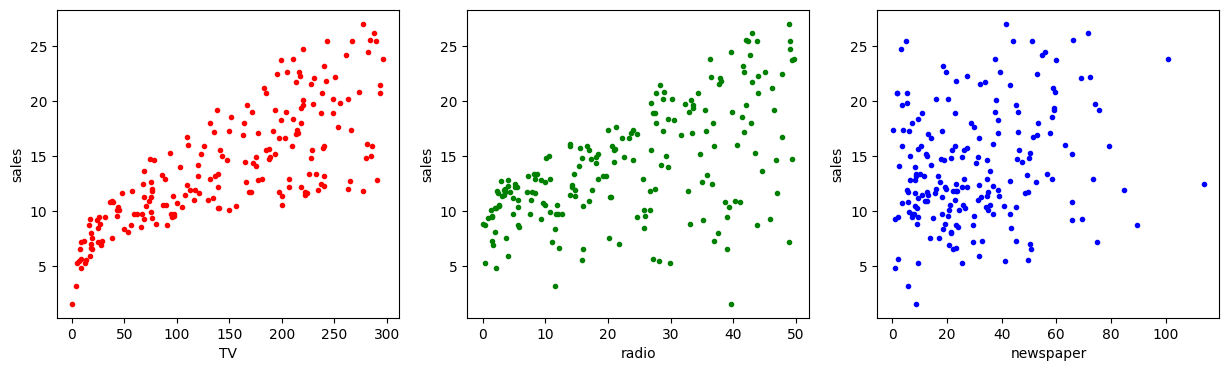

In [5]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df["TV"], data_df["sales"], color="red", marker=".")
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df["radio"], data_df["sales"], color="green", marker=".")
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"], data_df["sales"], color="blue", marker=".")
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

<ipython-input-6-e49c3a96765a>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
<ipython-input-6-e49c3a96765a>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))
<ipython-input-6-e49c3a96765a>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))


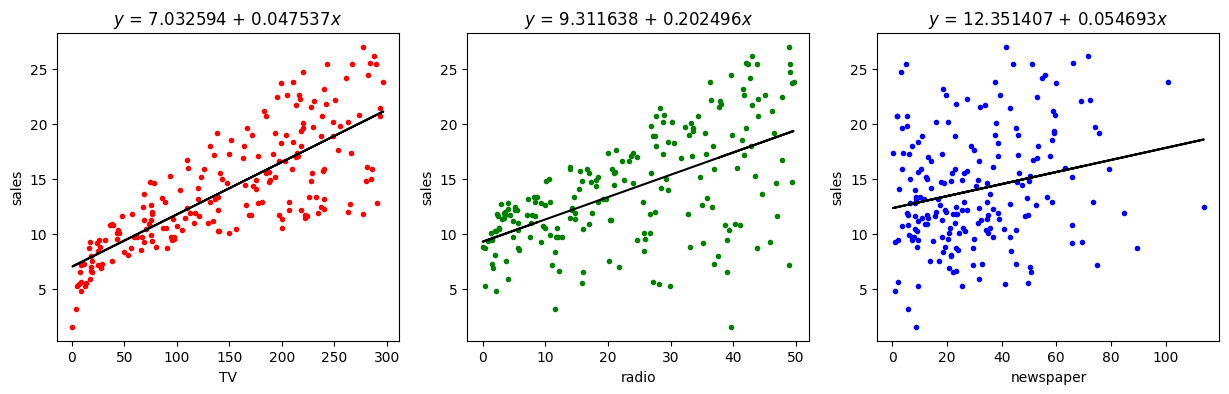

In [6]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, c):

  # initializing our inputs and outputs
  X = data_df[[feature]].values
  Y = data_df[["sales"]].values

  # mean of our inputs and outputs
  x_mean = np.mean(X)
  y_mean = np.mean(Y)

  #total number of samples
  n = len(X)

  # using the OLS formula to calculate the b1 and b0
  numerator = 0
  denominator = 0
  for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

  b1 = numerator / denominator
  b0 = y_mean - (b1 * x_mean)
  y_hat = b0 + np.dot(X,b1)

  ##Plot the regression line
  ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
  ax.plot(X, y_hat, color="black")
  ax.set_xlabel(feature)
  ax.set_ylabel("sales")
  ax.set_title(("$y$ = %3f + %3f$x$" %(b0, b1)))


# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()